1. Splitte die Daten in Trainings- und Testdaten vor der PCA.
2. Führe die PCA auf den Trainingsdaten durch.
3. Transformiere sowohl die Trainings- als auch die Testdaten unter Verwendung der auf den Trainingsdaten berechneten PCA.
4. Verwende die transformierten Daten für das Training und die Evaluation deines Modells.

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


train_data_loaded = pd.read_csv('../data/train_data_2024-08-01.csv')


X = train_data_loaded.drop(columns=['UKATEGORIE'])
y = train_data_loaded['UKATEGORIE']

# Aufteilen des Datensatzes in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Führe PCA durch
pca = PCA(n_components=6)
principal_components = pca.fit(X_train)

# Transformiere sowohl die Trainings- als auch die Testdaten
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Erstelle DataFrames für die transformierten Daten zur besseren Übersichtlichkeit 
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

print("Transformierte Trainingsdaten mit Hauptkomponenten:\n", X_train_pca_df)
print("Transformierte Testdaten mit Hauptkomponenten:\n", X_test_pca_df)


Transformierte Trainingsdaten mit Hauptkomponenten:
             PC1       PC2       PC3       PC4       PC5       PC6
0      2.686437 -1.495066  4.214843 -2.160477  2.889968  1.082841
1      1.512464 -2.401715  4.042666  2.462059 -2.125935 -0.709161
2      1.412484 -0.350105 -5.958768  1.554369 -3.030053  0.002492
3     -4.586688  3.314243  0.233843 -1.825882 -2.081944  1.397305
4      7.577970 -2.998993 -2.934384  5.458756  0.873422 -0.143900
...         ...       ...       ...       ...       ...       ...
32070  6.700036 -4.309354 -1.760485 -2.254016 -0.102256  0.860155
32071  3.649941 -3.307467  4.098597  2.589065  1.879262 -0.669980
32072 -1.316639 -4.581352 -3.781938 -2.945567  2.993503  1.820406
32073 -0.623803  1.451487 -2.791830 -0.733336 -2.019452 -3.801373
32074 -5.551452  1.479336 -0.813002  1.852605  1.926654  1.517539

[32075 rows x 6 columns]
Transformierte Testdaten mit Hauptkomponenten:
            PC1       PC2       PC3       PC4       PC5       PC6
0     4.530604 -

Ein Scree-Plot ist ein nützliches Werkzeug zur Visualisierung der Eigenwerte jeder Hauptkomponente nach einer Principal Component Analysis (PCA). Er zeigt, wie viel Varianz jede Hauptkomponente erklärt, und hilft dir zu entscheiden, wie viele Hauptkomponenten beibehalten werden sollten.
1. Eigenwerte und erklärte Varianz:
   - Auf der x-Achse sind die Hauptkomponenten in absteigender Reihenfolge der erklärten Varianz aufgetragen.
   - Auf der y-Achse sind die Eigenwerte oder die erklärte Varianz der einzelnen Hauptkomponenten aufgetragen.
   - Jeder Punkt auf dem Plot repräsentiert eine Hauptkomponente.

2. Kniepunkt (Elbow Point):
   - Suche nach einem Punkt, an dem die Kurve abflacht. Dies wird oft als "Kniepunkt" oder "Elbow Point" bezeichnet.
   - Vor dem Kniepunkt nimmt die erklärte Varianz stark ab, nach dem Kniepunkt nimmt sie langsamer oder kaum noch ab.
   - Dies deutet darauf hin, dass die Komponenten nach dem Kniepunkt weniger zur Gesamterklärung der Varianz beitragen und möglicherweise vernachlässigt werden können.

3. Erklärte Varianz auswählen:
   - Indem du die Komponenten vor dem Kniepunkt auswählst, kannst du die Dimensionen des Datensatzes reduzieren, während du dennoch einen Großteil der Varianz beibehältst.
   - Üblicherweise strebt man an, Komponenten zu wählen, die insgesamt 90-95% der Varianz erklären.

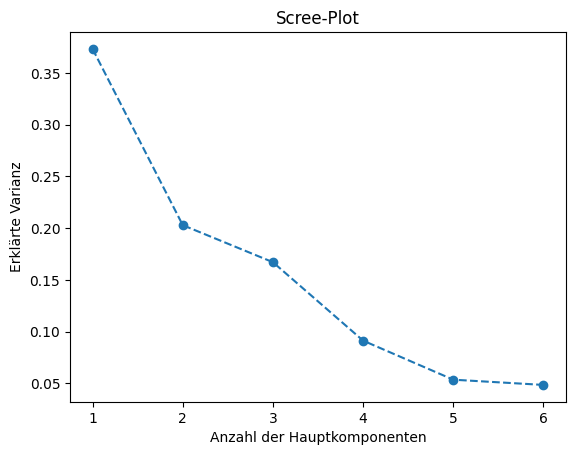

In [67]:
# Visualisiere den Scree-Plot (Eigenwerte der Hauptkomponenten)

plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Erklärte Varianz')
plt.title('Scree-Plot')
plt.show()

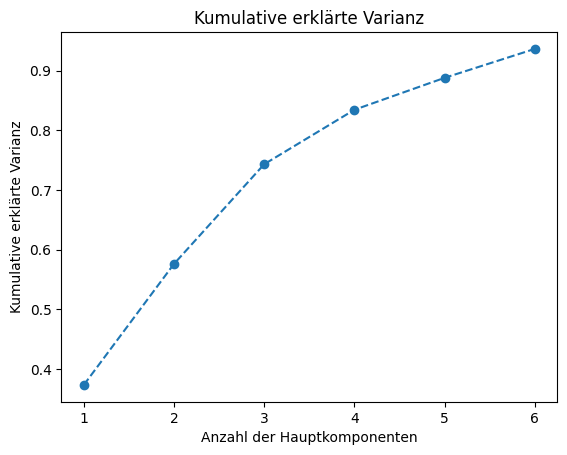

In [68]:
# Kumulative erklärte Varianz
plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz')
plt.show()

In [69]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score

In [73]:
# das muss noch verbessert werden

# Modell initialisieren und trainieren
model = BalancedRandomForestClassifier()
model.fit(X_train_pca, y_train)

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Vorhersagen und Evaluierung
y_pred = model.predict(X_test_pca)
# Define the f-beta scorer
#fbeta_scorer = make_scorer(fbeta_score, beta=2)

score = fbeta_score(y_test, y_pred, beta=2)
print("Genauigkeit des Modells mit PCA-transformierten Daten:", score)

/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/home/kasch/Nextcloud/IKT/venv/lib/python3.12/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and

Genauigkeit des Modells mit PCA-transformierten Daten: 0.4414181732801127
